In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [12]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('column_2C_weka.csv')

In [3]:
df.shape

(310, 7)

In [4]:
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


This Shows that the variables are not categorical

In [7]:
df.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


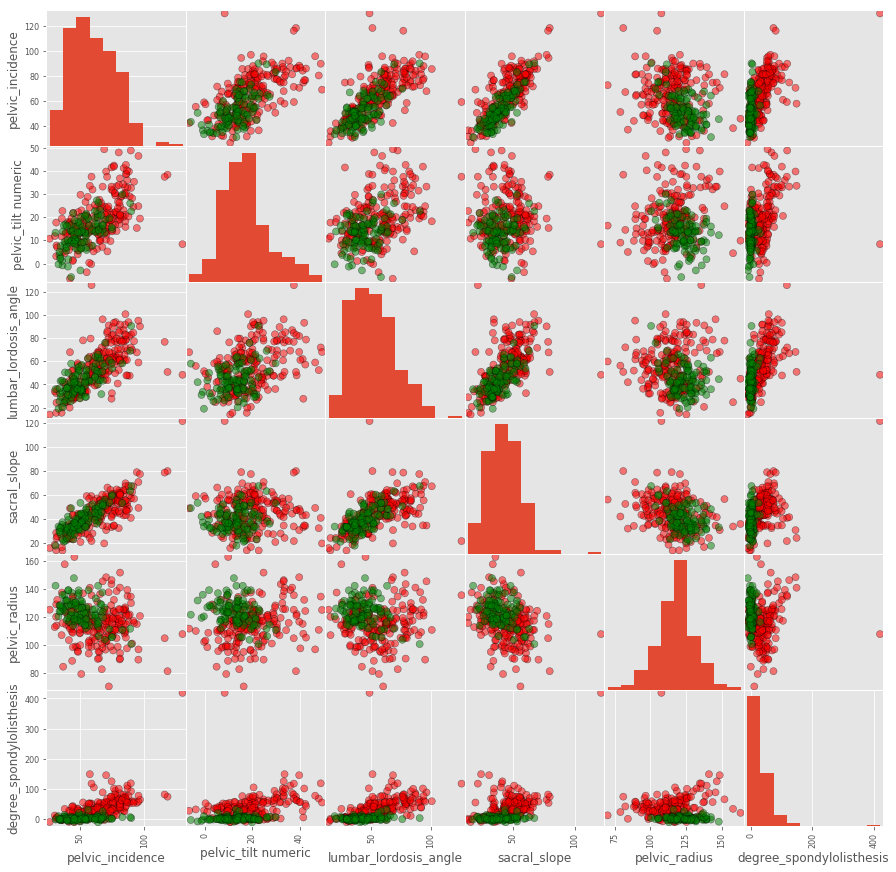

In [19]:
color_list = ['red' if i=='Abnormal' else 'green' for i in df.loc[:,'class']]
pd.plotting.scatter_matrix(df.loc[:, df.columns != 'class'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       marker = '.',
                                       edgecolor= "black")
plt.show()



In [50]:
from sklearn.model_selection import train_test_split

x,y = df.loc[:,df.columns != 'class'], df.loc[:,'class']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

classes = y.unique()

In [76]:
def plot_confusion_matrix(y_pred):
    cm = confusion_matrix(y_test,y_pred, labels=classes)
    print('Classification report: \n',classification_report(y_test,y_pred))
    sns.heatmap(cm,annot=True,fmt="d")

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    plt.xticks(np.arange(cm.shape[1]), classes)
    plt.yticks(np.arange(cm.shape[0]), classes)

    plt.show()


In [84]:
def fit_n_predict(clf):
    clf.fit(x_train, y_train)
    prediction = clf.predict(x_test)
    train_acc = clf.score(x_train, y_train)
    test_acc = clf.score(x_test, y_test)
    return prediction, train_acc, test_acc

# KNN

Classification report: 
               precision    recall  f1-score   support

    Abnormal       0.91      0.89      0.90        66
      Normal       0.75      0.78      0.76        27

   micro avg       0.86      0.86      0.86        93
   macro avg       0.83      0.84      0.83        93
weighted avg       0.86      0.86      0.86        93



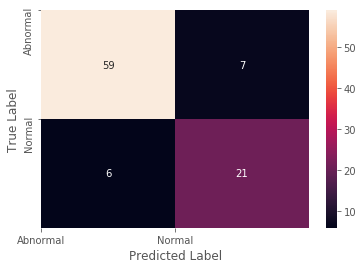

In [91]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors = 3)
prediction, _, acc = fit_n_predict(knn_clf)
plot_confusion_matrix(prediction)

## Find best K value

In [86]:
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    _, tr, te = fit_n_predict(knn)
    train_accuracy.append(tr)
    test_accuracy.append(te)

## Plot

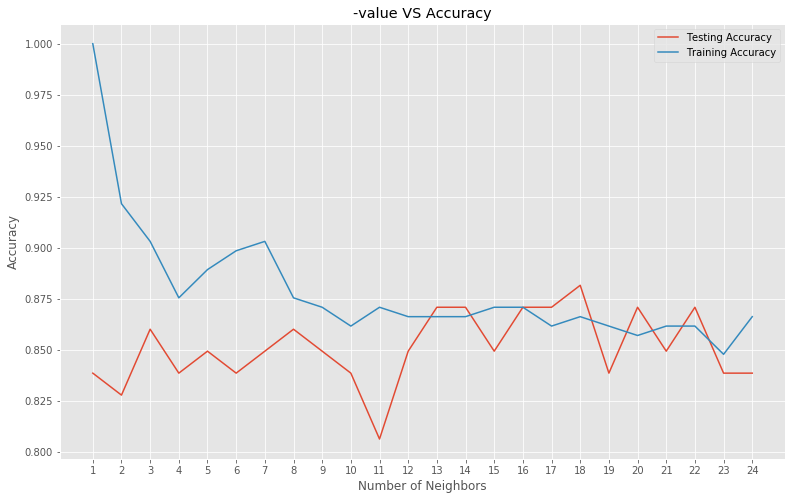

Best accuracy is 0.8817204301075269 with K = 18


In [73]:
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))


In [90]:
from sklearn.model_selection import cross_val_score

no_folds = 10
knn_clf = KNeighborsClassifier(n_neighbors=3)
cv_result = cross_val_score(knn_clf,x,y,cv=no_folds) # uses R^2 as score 
print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/no_folds)

CV Scores:  [0.51612903 0.5483871  0.67741935 0.83870968 0.90322581 0.93548387
 0.90322581 1.         0.90322581 0.87096774]
CV scores average:  0.8096774193548386


In [42]:
from sklearn.metrics import classification_report, confusion_matrix


# Random Forest Classifier

Train Accuracy: 0.9907834101382489	Test Accuracy: 0.8387096774193549
Classification report: 
               precision    recall  f1-score   support

    Abnormal       0.89      0.88      0.89        66
      Normal       0.71      0.74      0.73        27

   micro avg       0.84      0.84      0.84        93
   macro avg       0.80      0.81      0.81        93
weighted avg       0.84      0.84      0.84        93



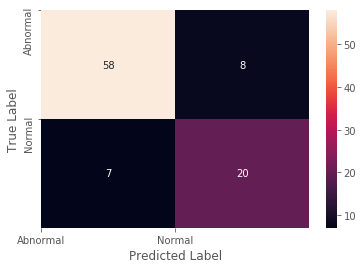

In [85]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 4)
prediction , train_acc, test_acc = fit_n_predict(rf)
print(f'Train Accuracy: {train_acc}\tTest Accuracy: {test_acc}')
plot_confusion_matrix(prediction)

In [52]:
classes

array(['Abnormal', 'Normal'], dtype=object)